In [1]:
import matplotlib.pyplot as plt
import tarfile
import os
import numpy as np
from skimage.measure import label, regionprops
from skimage import io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


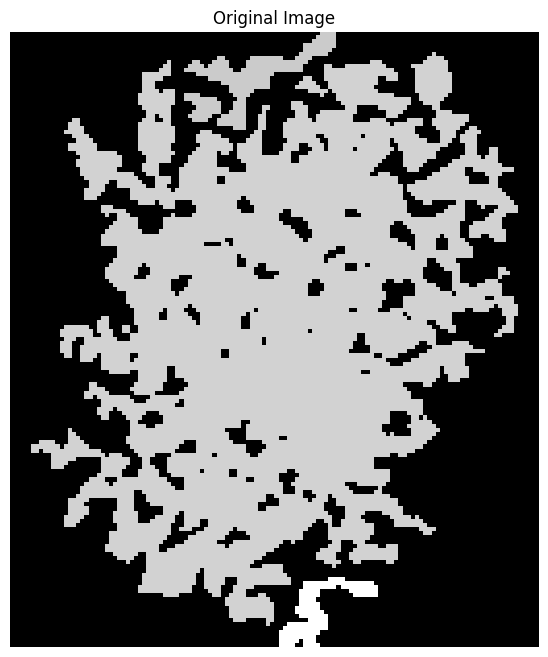

In [3]:
def visualize_image_processing(image_path, margin=5, min_size=100, top_n=2):
    img = io.imread(image_path)
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'  # Update this path
visualize_image_processing(image_path)

#Pixel Values

## Global Function

1. The result of processing each patch is appended to the results list, which eventually contains the processed data for all 5x5 patches in the image.
2. Global function using image patch size of 5 × 5 pixels

In [4]:
import numpy as np
from imageio import imread

def xGlob(image_path):
    # Load the image
    img = imread(image_path)

    # Ensure the image is in grayscale; if it's not, convert or assert an error
    if img.ndim == 3:
        raise ValueError("Image must be grayscale. Currently, it has multiple channels.")

    def process_patch(patch):
        return np.mean(patch)

    results = []
    for i in range(0, img.shape[0] - 4):
        for j in range(0, img.shape[1] - 4):
            # Extract a 5x5 patch
            patch = img[i:i+5, j:j+5]
            # Process the patch (e.g., compute the mean)
            result = process_patch(patch)
            results.append(result)

    return results

# Use the function
image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
results = xGlob(image_path)

print(results[:5])


[0.0, 0.0, 0.0, 0.0, 0.0]


<ipython-input-4-8cae5e32bfe4>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(image_path)


### Random Projection in Global Function

In [5]:
import numpy as np
from imageio import imread

# Priyanka's RP function unchanged
def random_projection_matrix(input_dim, output_dim):
    """
    Generates a random projection matrix with elements being either +1 or -1.
    """
    return np.random.choice([-1, 1], size=(output_dim, input_dim))


def xGlob(image_path):
    img = imread(image_path)
    if img.ndim == 3:
        raise ValueError("Image must be grayscale. Currently, it has multiple channels.")
    def process_patch(patch):
        return np.mean(patch)
    results = []
    for i in range(0, img.shape[0] - 4):
        for j in range(0, img.shape[1] - 4):
            patch = img[i:i+5, j:j+5]
            result = process_patch(patch)
            results.append(result)
    return results

input_dim = 10
output_dim = 5


image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
xGlob_results = xGlob(image_path)


xGlob_vector = np.array(xGlob_results).reshape(1, -1)

# Adjust input_dim based on the actual length of xGlob results
input_dim = xGlob_vector.shape[1]

# Generate RP matrix and apply it
rp_matrix = random_projection_matrix(input_dim, output_dim)
rp_results = np.dot(rp_matrix, xGlob_vector.T)  # Transpose to match dimensions for multiplication

print(rp_results)


<ipython-input-5-fa06f0d471cc>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(image_path)


[[ 591357.76]
 [-297959.2 ]
 [ 488082.56]
 [ 837046.  ]
 [ 227537.52]]


## Square Function
1. Extract the pixel values in concentric squares from the center of the patch outwards
2.  Using an optional patch size (5x5 pixels)
3. The square values for the first 5 patches as a demonstration of what the processing reveals.

In [15]:
import numpy as np
from PIL import Image

def load_image(image_path):
    # Load the image and convert to grayscale
    image = Image.open(image_path)
    image = image.convert('L')
    return np.array(image)

def get_square_values(patch):
    # Extract values in concentric squares
    center = np.array(patch.shape) // 2
    max_radius = min(center)
    square_values = []

    for r in range(max_radius + 1):
        # Create the square mask
        mask = np.zeros_like(patch, dtype=bool)
        mask[max(center[0]-r, 0):min(center[0]+r+1, patch.shape[0]),
             max(center[1]-r, 0):min(center[1]+r+1, patch.shape[1])] = True
        mask[max(center[0]-(r-1), 0):min(center[0]+(r-1)+1, patch.shape[0]),
             max(center[1]-(r-1), 0):min(center[1]+(r-1)+1, patch.shape[1])] = False
        # Extract and sort values
        square_values.extend(np.sort(patch[mask]))

    return np.array(square_values)

def process_image_for_squares(image_array, patch_size=5):
    rows, cols = image_array.shape
    square_values_list = []

    # Iterate over each possible 5x5 patch in the image
    for i in range(0, rows - patch_size + 1):
        for j in range(0, cols - patch_size + 1):
            # Extract the patch
            patch = image_array[i:i+patch_size, j:j+patch_size]
            # Get the square values from the patch
            square_values = get_square_values(patch)
            square_values_list.append(square_values)

    return square_values_list


image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = load_image(image_path)

# Process the image and get the square values for each patch
all_square_values = process_image_for_squares(image)

# For demonstration purposes, let's print the square values for the first 5 patches
for i, square_values in enumerate(all_square_values[:5]):
    print(f"Square Values for patch {i+1}:", square_values)


Square Values for patch 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Square Values for patch 2: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Square Values for patch 3: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Square Values for patch 4: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Square Values for patch 5: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Random Function in Square Function

In [6]:
import numpy as np
from PIL import Image


def load_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')
    return np.array(image)

def get_square_values(patch):
    center = np.array(patch.shape) // 2
    max_radius = min(center)
    square_values = []
    for r in range(max_radius + 1):
        mask = np.zeros_like(patch, dtype=bool)
        mask[max(center[0]-r, 0):min(center[0]+r+1, patch.shape[0]),
             max(center[1]-r, 0):min(center[1]+r+1, patch.shape[1])] = True
        mask[max(center[0]-(r-1), 0):min(center[0]+(r-1)+1, patch.shape[0]),
             max(center[1]-(r-1), 0):min(center[1]+(r-1)+1, patch.shape[1])] = False
        square_values.extend(np.sort(patch[mask]))
    return np.array(square_values)

def process_image_for_squares(image_array, patch_size=5):
    rows, cols = image_array.shape
    square_values_list = []
    for i in range(0, rows - patch_size + 1):
        for j in range(0, cols - patch_size + 1):
            patch = image_array[i:i+patch_size, j:j+patch_size]
            square_values = get_square_values(patch)
            square_values_list.append(square_values)
    return square_values_list


def random_projection_matrix(input_dim, output_dim):
    return np.random.choice([-1, 1], size=(output_dim, input_dim))

# Apply RP to the output of process_image_for_squares
def apply_rp(all_square_values, output_dim):
    # Flatten the list of arrays to a single 2D array where each row is a patch's square values
    data_matrix = np.array([np.pad(v, (0, max(0, output_dim - len(v))), 'constant', constant_values=0)
                            for v in all_square_values])
    input_dim = data_matrix.shape[1]  # Number of features
    rp_matrix = random_projection_matrix(input_dim, output_dim)
    rp_results = np.dot(data_matrix, rp_matrix.T)
    return rp_results


image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = load_image(image_path)
all_square_values = process_image_for_squares(image)


output_dim = 100

# Apply RP
rp_results = apply_rp(all_square_values, output_dim)

# Demonstration: Print RP results for the first 5 patches
for i, rp_result in enumerate(rp_results[:5]):
    print(f"RP Results for patch {i+1}:", rp_result)


RP Results for patch 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
RP Results for patch 2: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
RP Results for patch 3: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
RP Results for patch 4: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
RP Results for patch 5: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Circle Function

1. Takes a 5x5 pixel patch of the image as input and extracts values from concentric circles centered within the patch.
2. Calculates the center of the patch and iterates through radii from 0 to half the patch size, creating a mask for each circle using a distance formula from the center.
3. The Circle values for the first 5 patches as a demonstration of what the processing reveals.

In [7]:
import numpy as np
from PIL import Image

def load_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # convert to grayscale
    return np.array(image)

def get_circle_values(patch):
    center = np.array(patch.shape) // 2
    circle_values = []

    for r in range(patch.shape[0] // 2 + 1):
        # Create the circle mask
        Y, X = np.ogrid[:patch.shape[0], :patch.shape[1]]
        dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)
        mask = (dist_from_center >= r) & (dist_from_center < r + 1)
        # Extract and sort values
        circle_values.extend(np.sort(patch[mask]))

    return np.array(circle_values)

def process_image_for_circles(image_array, patch_size=5):

    rows, cols = image_array.shape
    circle_values_list = []

    # Iterate over each possible patch in the image
    for i in range(0, rows - patch_size + 1):
        for j in range(0, cols - patch_size + 1):
            # Extract the patch
            patch = image_array[i:i+patch_size, j:j+patch_size]
            # Get the circle values from the patch
            circle_values = get_circle_values(patch)
            circle_values_list.append(circle_values)

    return circle_values_list


image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = load_image(image_path)

# Process the image and get the circle values for each patch
all_circle_values = process_image_for_circles(image)

# For demonstration purposes, let's print the circle values for the first 5 patches
for i, circle_values in enumerate(all_circle_values[:5]):
    print(f"Circle Values for patch {i+1}:", circle_values)


Circle Values for patch 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Circle Values for patch 2: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Circle Values for patch 3: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Circle Values for patch 4: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Circle Values for patch 5: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Random Projection in Circle Function  

In [8]:
import numpy as np
from PIL import Image


def load_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # convert to grayscale
    return np.array(image)

def get_circle_values(patch):
    center = np.array(patch.shape) // 2
    circle_values = []
    for r in range(patch.shape[0] // 2 + 1):
        Y, X = np.ogrid[:patch.shape[0], :patch.shape[1]]
        dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)
        mask = (dist_from_center >= r) & (dist_from_center < r + 1)
        circle_values.extend(np.sort(patch[mask]))
    return np.array(circle_values)

def process_image_for_circles(image_array, patch_size=5):
    rows, cols = image_array.shape
    circle_values_list = []
    for i in range(0, rows - patch_size + 1):
        for j in range(0, cols - patch_size + 1):
            patch = image_array[i:i+patch_size, j:j+patch_size]
            circle_values = get_circle_values(patch)
            circle_values_list.append(circle_values)
    return circle_values_list

# Random Projection function
def random_projection_matrix(input_dim, output_dim):
    return np.random.choice([-1, 1], size=(output_dim, input_dim))

# Adapted application of RP to circle values
def apply_rp_to_circles(all_circle_values, input_dim=10, output_dim=5):
    # Prepare circle values data: truncate or pad to match input_dim
    prepared_data = []
    for values in all_circle_values:
        if len(values) > input_dim:
            prepared_data.append(values[:input_dim])  # Truncate
        else:
            prepared_data.append(np.pad(values, (0, max(0, input_dim - len(values))), 'constant'))  # Pad
    data_matrix = np.stack(prepared_data)
    rp_matrix = random_projection_matrix(input_dim, output_dim)
    rp_results = np.dot(data_matrix, rp_matrix.T)
    return rp_results

# Example usage
image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = load_image(image_path)
all_circle_values = process_image_for_circles(image)
rp_results = apply_rp_to_circles(all_circle_values)

# Print the RP results for demonstration
for i, rp_result in enumerate(rp_results[:5]):
    print(f"RP Results for patch {i+1}:", rp_result)


RP Results for patch 1: [0 0 0 0 0]
RP Results for patch 2: [0 0 0 0 0]
RP Results for patch 3: [0 0 0 0 0]
RP Results for patch 4: [0 0 0 0 0]
RP Results for patch 5: [0 0 0 0 0]


## Pixel Differences

## Angular difference

1. Involves assessing pixel differences in an angular pattern.
2. Diagonal or other angular orientations within the patch to capture the texture's directionality and angular variance.
3. Print Angular Results

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def calculate_angular_differences(patch):
    # Calculate differences in multiple directions
    horizontal_diffs = np.diff(patch, axis=1)[:-1, :]  # Horizontal differences, excluding last row for alignment
    vertical_diffs = np.diff(patch, axis=0)[:, :-1]  # Vertical differences, excluding last column for alignment
    diagonal_diffs = np.diff(patch.diagonal())  # Diagonal differences

    # Additional direction (e.g., anti-diagonal) for more angular variation
    anti_diagonal_diffs = np.diff(np.fliplr(patch).diagonal())

    # Combine all differences into a single descriptor vector
    descriptor = np.concatenate([
        horizontal_diffs.flatten(),
        vertical_diffs.flatten(),
        diagonal_diffs.flatten(),
        anti_diagonal_diffs.flatten()
    ])

    return descriptor

# Placeholder for image loading
image = io.imread('/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif')

# Simulating a 5x5 patch extraction for demonstration
patch = np.random.randint(0, 255, (5, 5))

# Compute the Angular Descriptor for the patch
angular_descriptor = calculate_angular_differences(patch)

print("Angular Descriptor:", angular_descriptor)


Angular Descriptor: [ -39  -40  244  -96   34   32   -8  -31  144   -6  -46   17   14  122
  -15   48   65  138  210  -42  -73   37   -1  -39    1 -129   -1   30
  -12  -14 -157  -12   99   31  -16 -126   54    7 -123  -26]


### Random Projection in Angular Descriptor

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def calculate_angular_differences(patch):
    # Calculate differences in multiple directions
    horizontal_diffs = np.diff(patch, axis=1)[:-1, :]  # Horizontal differences, excluding last row for alignment
    vertical_diffs = np.diff(patch, axis=0)[:, :-1]  # Vertical differences, excluding last column for alignment
    diagonal_diffs = np.diff(patch.diagonal())  # Diagonal differences

    # Additional direction (e.g., anti-diagonal) for more angular variation
    anti_diagonal_diffs = np.diff(np.fliplr(patch).diagonal())

    # Combine all differences into a single descriptor vector
    descriptor = np.concatenate([
        horizontal_diffs.flatten(),
        vertical_diffs.flatten(),
        diagonal_diffs.flatten(),
        anti_diagonal_diffs.flatten()
    ])

    return descriptor

def random_projection_matrix(input_dim, output_dim):
    """
    Generates a random projection matrix with elements being either +1 or -1.

    Parameters:
        input_dim (int): Dimension of the input space.
        output_dim (int): Dimension of the output space.

    Returns:
        np.ndarray: Random projection matrix of shape (output_dim, input_dim).
    """
    return np.random.choice([-1, 1], size=(output_dim, input_dim))

# Load the image
image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = io.imread(image_path, as_gray=True)

# Simulating a 5x5 patch extraction for demonstration
patch = np.random.randint(0, 255, (5, 5))  # For actual use, extract a patch from 'image'

# Compute the Angular Descriptor for the patch
angular_descriptor = calculate_angular_differences(patch)

# Specify the dimensions for the random projection
input_dim = len(angular_descriptor)  # Input dimension is the length of the angular descriptor
output_dim = 10  # Output dimension for the reduced space

# Generate the random projection matrix and apply it
rp_matrix = random_projection_matrix(input_dim, output_dim)
projected_angular_descriptor = np.dot(rp_matrix, angular_descriptor)

print("Angular Descriptor:", angular_descriptor)
print("Projected Angular Descriptor:", projected_angular_descriptor)


Angular Descriptor: [-189   24  136    1   53  104 -131  -44  158  -99  110 -184 -172   87
  -96   34 -111  131  211  -56    3  108  -95  146  131 -199  -13 -219
   35  114 -113  153  -58    9 -109   72  -57   36 -100  207]
Projected Angular Descriptor: [-1770 -1778 -1006 -1044 -1002   132   408  -424  -796  1642]


## Radial Differences
1. Consider the distance of each pixel from the center of the patch (5x5).
2. Based on the differences in intensity values as a function of distance from this center pixel.
3. Calculate the radial descriptor by assessing the intensity values of pixels at increasing distances from the center.
4. Given the non-continuous nature of pixel locations and the square shape of the patch, this step involves grouping pixels by their rounded distance from the center and summarizing these groups' intensities, possibly by mean or sum.

In [34]:
import numpy as np
from skimage import io, img_as_float
from scipy.spatial.distance import cdist

def compute_radial_descriptor(patch):
    center = np.array([[2, 2]])  # Center of the patch
    coords = np.indices(dimensions=patch.shape).reshape(2, -1).T  # Coordinates of all pixels

    # Compute distances of all pixels from the center
    distances = cdist(coords, center, metric='euclidean').flatten()

    # Round distances to nearest half to group pixels radially
    rounded_distances = np.round(distances * 2) / 2

    # Compute the radial descriptor as the mean intensity for each radial distance
    radial_descriptor = {}
    for distance in np.unique(rounded_distances):
        mask = rounded_distances == distance
        radial_descriptor[distance] = np.mean(patch.flatten()[mask])

    return radial_descriptor


image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = img_as_float(io.imread(image_path, as_gray=True))

# Extract a 5x5 patch from the image (example: top-left corner)
patch = image[0:5, 0:5]

# Compute the Radial Descriptor for the patch
radial_descriptor = compute_radial_descriptor(patch)

print("Radial Descriptor:", radial_descriptor)


Radial Descriptor: {0.0: 0.0, 1.0: 0.0, 1.5: 0.0, 2.0: 0.0, 3.0: 0.0}


### Random Projection in Radial Differences

Select a Patch with Features: Instead of selecting the top-left corner, choose a part of the image that visibly contains features.

Compute the Radial Descriptor: Run the compute_radial_descriptor on the selected patch.

Apply Random Projection: Only if the radial descriptor is non-zero, apply the RP to get the projected descriptor.

In [38]:
import numpy as np
from skimage import io, img_as_float
from scipy.spatial.distance import cdist

def compute_radial_descriptor(patch):
    # Center of the patch
    center = np.array([patch.shape[0] // 2, patch.shape[1] // 2])
    # Create an array with the coordinates of each pixel
    y, x = np.ogrid[:patch.shape[0], :patch.shape[1]]
    # Compute the distance of each pixel from the center
    dist_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)

    # Flatten the arrays to use them as masks
    patch_flat = patch.flatten()
    dist_flat = dist_from_center.flatten()

    # Calculate the mean intensity for each unique distance from the center
    unique_dists = np.unique(dist_flat)
    radial_descriptor = [patch_flat[dist_flat == d].mean() for d in unique_dists]

    return np.array(radial_descriptor)

def random_projection_matrix(input_dim, output_dim):
    return np.random.choice([-1, 1], size=(output_dim, input_dim))

# Load the TIF image and convert it to grayscale float
image_path = '/content/drive/My Drive/ExtractionResults/157/cropped_images/top_intensity_nucleus_30_1.tif'
image = img_as_float(io.imread(image_path, as_gray=True))

# Define patch size
patch_size = 5
# Calculate the coordinates of the center of the image
image_center = np.array(image.shape) // 2

# Extract a patch around the center of the image
start = image_center - patch_size // 2
end = start + patch_size
patch = image[start[0]:end[0], start[1]:end[1]]

# Compute the radial descriptor for the patch
radial_descriptor = compute_radial_descriptor(patch)

# Ensure the radial_descriptor is the correct length
if len(radial_descriptor) > 10:
    radial_descriptor = radial_descriptor[:10]
elif len(radial_descriptor) < 10:
    radial_descriptor = np.pad(radial_descriptor, (0, 10 - len(radial_descriptor)), 'constant')

# Generate the random projection matrix
RP = random_projection_matrix(10, 5)
# Apply the random projection
fr = np.dot(RP, radial_descriptor)

print("Projected Radial Descriptor:", fr)


Projected Radial Descriptor: [ 0.00000000e+00 -4.94811684e-06  0.00000000e+00 -9.89623368e-06
 -4.94811684e-06]
